# Pre-Processing and Modeling <a id='Contents'></a>
* [Overview](#Overview)
* [Import Packages and Load Data](#Import_packages)
* [Dummy Features](#Dummy_Features)
* [Train-Test Split](#Train_Test_Split)
* [Standardize / Normalize](#Standardize_Normalize)
* [Model Building](#Model_Building)
* [Conclusion](#Conclusion)

## Overview  <a id = 'Overview'></a>

The main objectives of this Note book is to prepare the dataset (Pre-Process) so that the data can be split fpr training and testing.
-  1. Prepare Categorial features for m
-  2. Transform the Numerical features


**The ModelReady_LoanDefault.csv Features**</br>
Categorical Features:  Education, Employment Type, Loan Purpose, MaritalStatus, HasMortgage, HasDependents, HasCoSigner</br>
Numerical Features: Age, Income, LoanAmount, CreditScore, MonthsEmployed, NumCreditLines, InterestRate, LoanTerm, DTIRatio

Target Variable: Default (A binary value to indicate Load Default (1), No Default (0)



## Import Packages and Load Data  <a id = 'Import_packages'></a>

In [1]:
#Import Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


from scipy.stats import pearsonr
from scipy.stats import chi2_contingency



In [2]:
#Load Data
dataset = pd.read_csv('ModelReady_LoanDefault.csv')
dataset2 = pd.read_csv('ModelReady_LoanDefault.csv')

In [3]:
dataset.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


## Dummy Features  <a id = 'Dummy_Features'></a>

The Exploratory Data Analysis showed that all categorical featues, which are Education, Employment Type, Loan Purpose have  significant association with the target variable "Default,". Therefore it is crucial to properly encode it for modeling. By converting it into dummy variables, you preserve the distinct categories of the different levels of those categorical features, allowing the model to learn their individual effects on the target variable.


In [4]:
# Select categorical features
categorical_features = ['Education', 'EmploymentType', 'LoanPurpose', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner']

# Create dummy variables for all categorical features
dummy_df = pd.get_dummies(dataset[categorical_features], drop_first=True)

# Concatenate the dummy variables with the original DataFrame
dataset = pd.concat([dataset, dummy_df], axis=1)

# Drop the original categorical features
dataset.drop(categorical_features, axis=1, inplace=True)


In [5]:
dataset.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,0,1,0,0,1,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,0,0,0,1,1,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,1,0,0,0,0,0,0,1,1,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,0,0,0,0,1,0


## Train-Test Split  <a id = 'Train_Test_Split'></a>

Train-Test split is a fundamental technique in machine learning that helps ensure the reliability and generalizability of your models. It allows you to assess model performance, detect overfitting, tune hyperparameters, and select the best model for your task.

In [6]:
# X contains the features, y contains the target variable
y = dataset['Default']
X = dataset.drop('Default', axis=1)

In [7]:
# Create a 80/20 train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize / Normalize  <a id = 'Standardize_Normalize'></a>

In [8]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Use the same fitted scaler to transform X_test
X_test_scaled = scaler.transform(X_test)

## Model Building  <a id = 'Model_Building'></a>

### KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=8)

# Fit the classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.8833757587624829


### Gradient Boosting

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Fit the classifier on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_gb = gb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print("GB Accuracy:", accuracy)

GB Accuracy: 0.8871744664186411


### Random Forests

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the classifier on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.8863716467593499


## Evaluation

### Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:")
print(conf_matrix_knn)

# Confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix for Gradient Boosting:")
print(conf_matrix_gb)

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix for Random Forest:")
print(conf_matrix_rf)


Confusion Matrix for KNN:
[[45042   128]
 [ 5828    72]]

Confusion Matrix for Gradient Boosting:
[[45007   163]
 [ 5599   301]]

Confusion Matrix for Random Forest:
[[45079    91]
 [ 5712   188]]


### Classification Report

In [13]:
from sklearn.metrics import classification_report

# Classification report for KNN
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Classification report for Gradient Boosting
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Classification report for Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.36      0.01      0.02      5900

    accuracy                           0.88     51070
   macro avg       0.62      0.50      0.48     51070
weighted avg       0.82      0.88      0.83     51070


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.65      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.77      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.67      0.03      0.06      5900

    accuracy                           0.89     51070
   macro 

### Plotting the Cnfusion Matrix

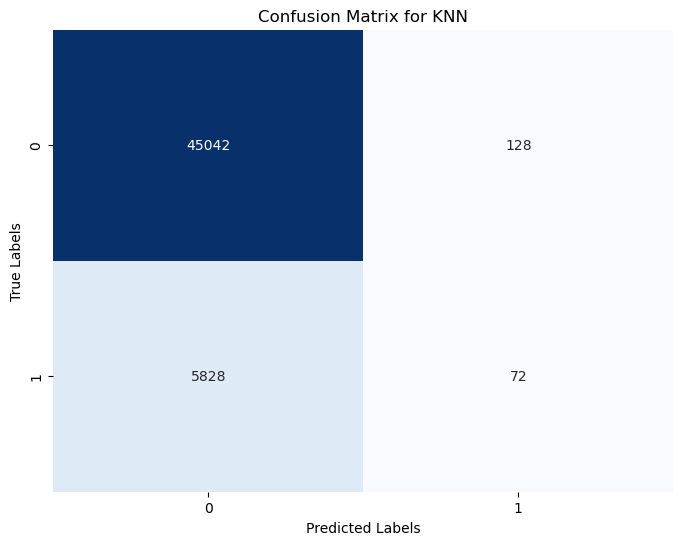

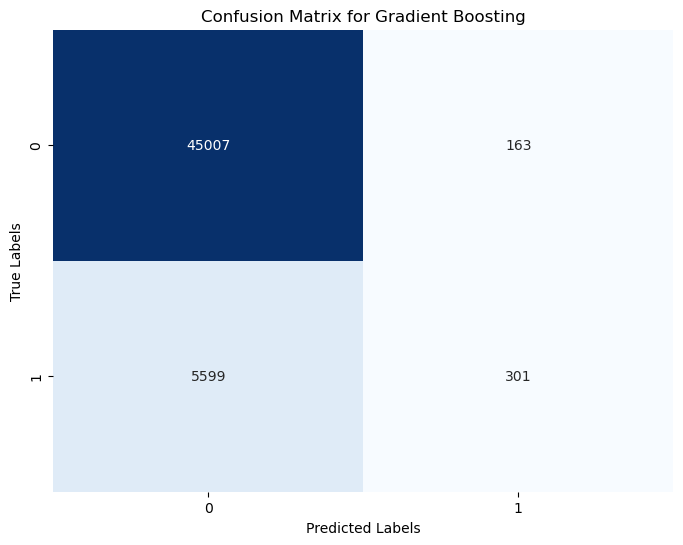

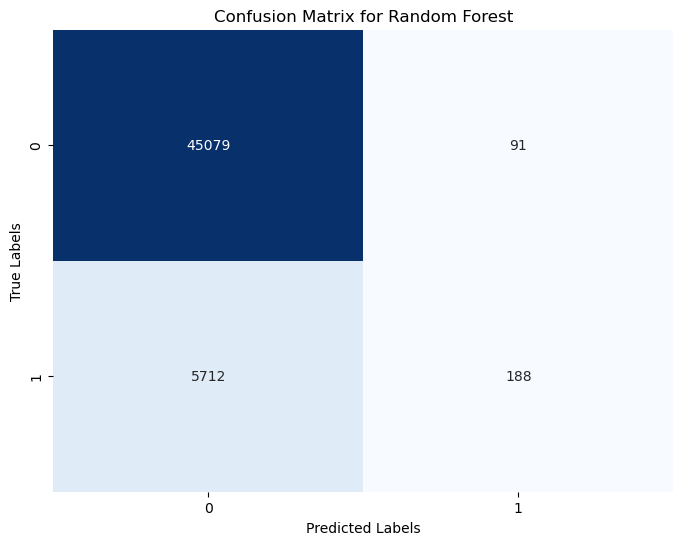

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Plot confusion matrices for KNN, Gradient Boosting, and Random Forest
plot_confusion_matrix(conf_matrix_knn, 'Confusion Matrix for KNN')
plot_confusion_matrix(conf_matrix_gb, 'Confusion Matrix for Gradient Boosting')
plot_confusion_matrix(conf_matrix_rf, 'Confusion Matrix for Random Forest')


### Interpretation


Based on the provided confusion matrices and classification reports for the three models (KNN, Gradient Boosting, and Random Forest), here are some observations:

##### Confusion Matrix Analysis:
**KNN:**

-  True Negative (TN):  45042
-  False Positive (FP): 128
-  False Negative (FN): 5828
-  True Positive (TP):  72

**Gradient Boosting:**

-  TN: 45007
-  FP: 163
-  FN: 5599
-  TP: 301


**Random Forest:**

-  TN: 45079
-  FP: 91
-  FN: 5712
-  TP: 188



##### Classification Report Analysis:
**Precision:** Indicates the proportion of correctly predicted positive cases out of all cases predicted as positive.

**Recall:** Indicates the proportion of correctly predicted positive cases out of all actual positive cases.

**F1-score:** Harmonic mean of precision and recall. It provides a balance between precision and recall.

**Support:** The number of actual occurrences of the class in the specified dataset.



**Observations:**

For all three models, the recall for class 1 (defaulted loans) is relatively low, indicating that the models have difficulty correctly identifying defaulted loans.

The precision for class 1 is also low for all models, suggesting that a considerable portion of the predicted defaulted loans are false positives.

The overall accuracy is high for Gradient Boosting and Random Forest compared to KNN

### Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-validation score:", mean_cv_score)


Cross-validation scores: [0.8750979  0.87436362 0.87443397 0.87387101 0.87477665]
Mean Cross-validation score: 0.8745086307109368


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Perform cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Gradient Boosting Cross-validation scores:", gb_cv_scores)

# Calculate the mean cross-validation score
gb_mean_cv_score = gb_cv_scores.mean()
print("Mean Gradient Boosting Cross-validation score:", gb_mean_cv_score)


Gradient Boosting Cross-validation scores: [0.88618563 0.88606325 0.88618284 0.88625627 0.88544854]
Mean Gradient Boosting Cross-validation score: 0.8860273051089262


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Random Forest Cross-validation scores:", rf_cv_scores)

# Calculate the mean cross-validation score
rf_mean_cv_score = rf_cv_scores.mean()
print("Mean Random Forest Cross-validation score:", rf_mean_cv_score)


Random Forest Cross-validation scores: [0.88579401 0.88532896 0.88508139 0.88571778 0.88505691]
Mean Random Forest Cross-validation score: 0.8853958089684568


### Interpretation

Interpretation:

The cross-validation scores represent the performance of each model on different subsets of the training data.
The mean cross-validation score provides an overall assessment of each model's performance across multiple folds of the training data.


A higher mean cross-validation score indicates better generalization performance.</br>
In this case, the Gradient Boosting model has the highest mean cross-validation score (0.8860), followed by Random Forest (0.8853), and then KNN (0.8745). Therefore, based on cross-validation, the Gradient Boosting model appears to perform the best among the three models.

## Taking Gradient Boosting forward

In [19]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Reduced number of estimators for faster training
    'learning_rate': [0.01, 0.1],  # Reduced learning rates
    'max_depth': [3, 5]  # Reduced max depth
}

# Initialize Gradient Boosting classifier
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, scoring='accuracy')  # Reduced cv folds

# Perform hyperparameter search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train, y_train)

# Evaluate on the test set
test_accuracy = best_gb_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)



Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Test Accuracy: 0.8878793812414333


## Conclusion  <a id = 'Conclusion'></a>

These outocomes are the final round from various trial-and-error.
At first the splitting was done at 70/30. Then the second round, the data results were evaluated from a 80/20 splits and found the outcomes had some slight improvements.

The hyperparameter tuning takes almost 1 hour to complete, and with that did not see significant improvement.


### Modeling Summary

**Accuracy Comparison:**

KNN: 0.883
Gradient Boosting: 0.887
Random Forest: 0.886
All three models have relatively high accuracy scores, with Gradient Boosting achieving the highest accuracy.

**Confusion Matrix Analysis:**

**KNN** has a large number of true negatives (TN) but a very low number of true positives (TP), indicating that it tends to classify most instances as non-defaults.
**Gradient Boosting**  has more true positives than KNN, indicating a better balance between correctly predicting defaults and non-defaults compared to KNN.
**Random Forest**, similar to Gradient Boosting, also has more true positives compared to KNN, indicating better performance in predicting defaults.


**Classification Report Analysis:**

KNN has low precision, recall, and F1-score for the default class (1), indicating that it performs poorly in identifying defaults. It has high accuracy due to a large number of true negatives but is not effective in predicting defaults.
Gradient Boosting has better precision, recall, and F1-score for the default class compared to KNN, indicating an improvement in identifying defaults. However, the recall and F1-score for the default class are still relatively low.
Random Forest, similar to Gradient Boosting, also shows improvement in identifying defaults compared to KNN, but the recall and F1-score for the default class are still relatively low.


While all three models have high accuracy, they struggle to effectively identify defaults (class 1), as indicated by low precision, recall, and F1-score for this class.
Gradient Boosting and Random Forest show some improvement over KNN in identifying defaults.


**Final Thoughts**

In the context of loan default prediction, minimizing false negatives (FN) is crucial because it's important to correctly identify individuals who are likely to default. Therefore, True Positives (TP) represent instances where the model correctly identifies actual defaults, which is a key consideration for evaluating the model's performance.

Among the models evaluated, Gradient Boosting appears to perform slightly better than the others in terms of correctly identifying defaults, as indicated by a higher number of true positives and relatively higher precision, recall, and F1-score for the default class compared to KNN and Random Forest. However, all models still show room for improvement in correctly identifying defaults, as indicated by relatively low recall and F1-score for the default class.

Therefore, the suggested model would be Gradient Boosting, but further optimization and tuning of the model may be necessary to improve its performance in correctly identifying defaults, which is critical for making informed decisions in the loan application approval process.